# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [14]:
from utils import get_dataset2
import glob

In [15]:
tf_record_files = []
for data_folder in ["training_and_validation"]:
    data_files = glob.glob('./data/waymo/{}/*.tfrecord'.format(data_folder))
    tf_record_files.extend(data_files)
tf_record_files.sort()

dataset = get_dataset2(tf_record_files, "./experiments/label_map.pbtxt")

INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/training_and_validation/segment-10017090168044687777_6380_000_6400_000_with_camera_labels.tfrecord', './data/waymo/training_and_validation/segment-10023947602400723454_1120_000_1140_000_with_camera_labels.tfrecord', './data/waymo/training_and_validation/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord', './data/waymo/training_and_validation/segment-10061305430875486848_1080_000_1100_000_with_camera_labels.tfrecord', './data/waymo/training_and_validation/segment-10072140764565668044_4060_000_4080_000_with_camera_labels.tfrecord', './data/waymo/training_and_validation/segment-10075870402459732738_1060_000_1080_000_with_camera_labels.tfrecord', './data/waymo/training_and_validation/segment-10082223140073588526_6140_000_6160_000_with_camera_labels.tfrecord', './data/waymo/training_and_validation/segment-10094743350625019937_3420_000_3440_000_with_camera_labels.tfrecord', './data/waymo/training_and_validati

INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/training_and_validation/segment-10017090168044687777_6380_000_6400_000_with_camera_labels.tfrecord', './data/waymo/training_and_validation/segment-10023947602400723454_1120_000_1140_000_with_camera_labels.tfrecord', './data/waymo/training_and_validation/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord', './data/waymo/training_and_validation/segment-10061305430875486848_1080_000_1100_000_with_camera_labels.tfrecord', './data/waymo/training_and_validation/segment-10072140764565668044_4060_000_4080_000_with_camera_labels.tfrecord', './data/waymo/training_and_validation/segment-10075870402459732738_1060_000_1080_000_with_camera_labels.tfrecord', './data/waymo/training_and_validation/segment-10082223140073588526_6140_000_6160_000_with_camera_labels.tfrecord', './data/waymo/training_and_validation/segment-10094743350625019937_3420_000_3440_000_with_camera_labels.tfrecord', './data/waymo/training_a

INFO:tensorflow:Number of filenames to read: 97


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from matplotlib.patches import Rectangle

In [17]:
def display_instances(instance, curr_ist, num_istances_display):
    """
    This function takes an instance from the dataset and display the image with
    the associated bounding boxes.
    """

    img = instance['image'].numpy()
    h, w, c = img.shape
    bboxes = instance['groundtruth_boxes'].numpy()
    bboxes[:, (0, 2)] *= h
    bboxes[:, (1, 3)] *= w
    classes = instance['groundtruth_classes'].numpy()
    frame_name = instance['filename'].numpy()

    # VISUALIZATION
    #print(curr_ist)
    #print("Frame {}".format(frame_name))
    f, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(img.astype(np.uint8))

    # color mapping of classes
    colormap = {1: [1, 0, 0], 2: [0, 1, 0], 4: [0, 0, 1]}
    for bb, cl in zip(bboxes, classes):
        y1, x1, y2, x2 = bb
        rec = Rectangle((x1, y1), x2 - x1, y2 - y1, facecolor='none',
                        edgecolor=colormap[cl])
        ax.add_patch(rec)

    plt.title(f'Frame {curr_ist} of {num_istances_display}')
    plt.show()

    return

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

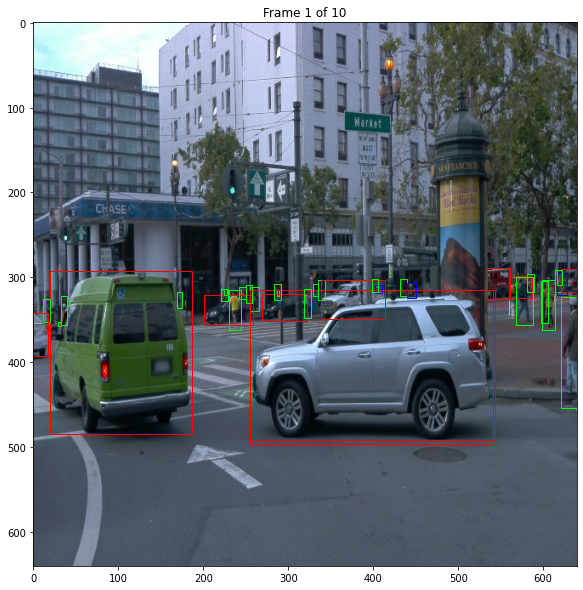

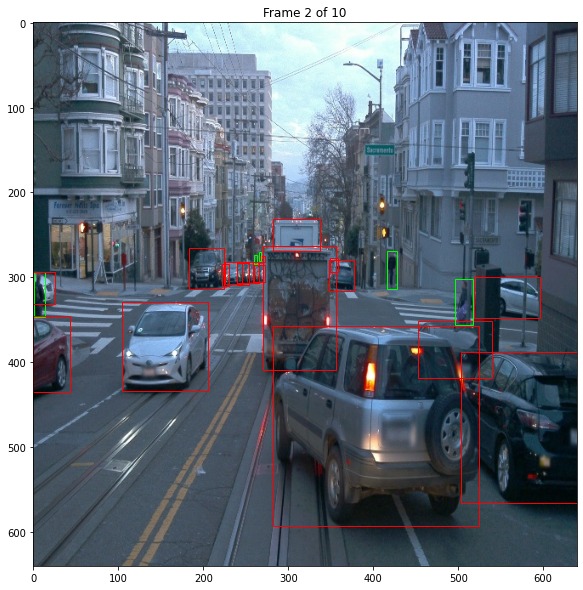

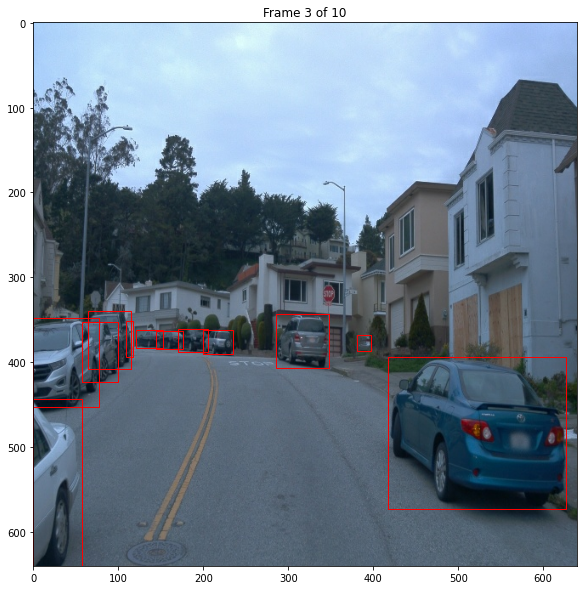

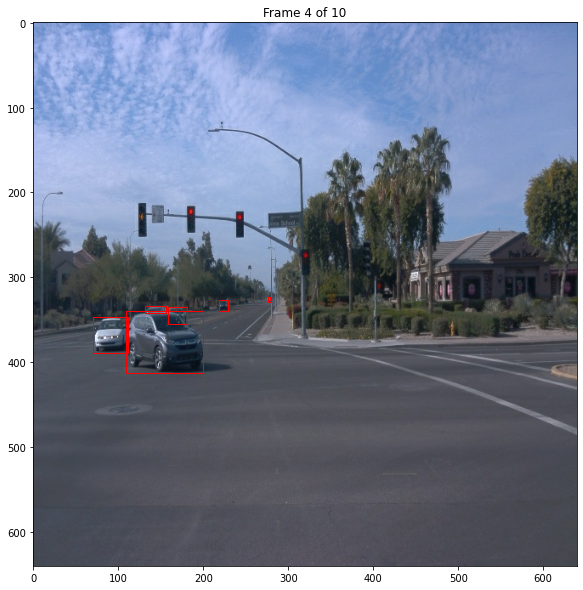

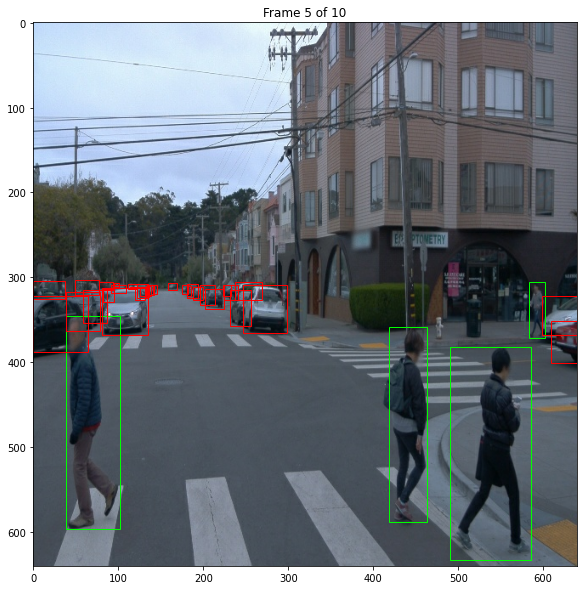

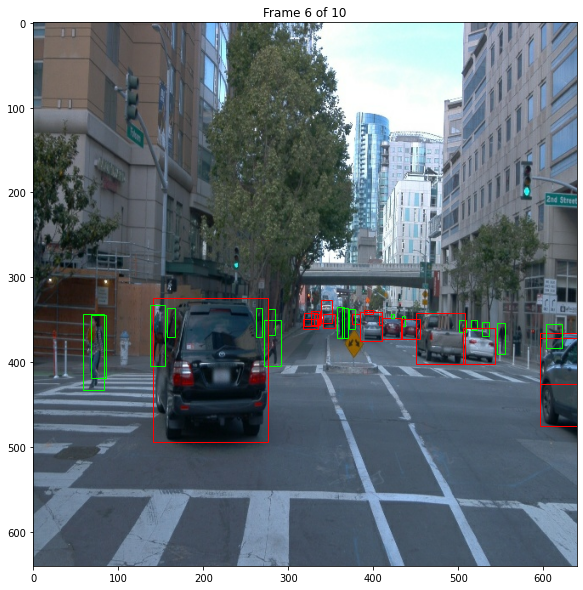

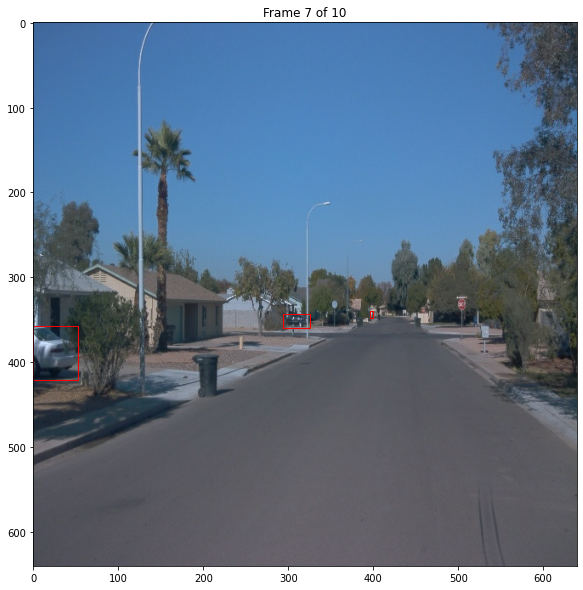

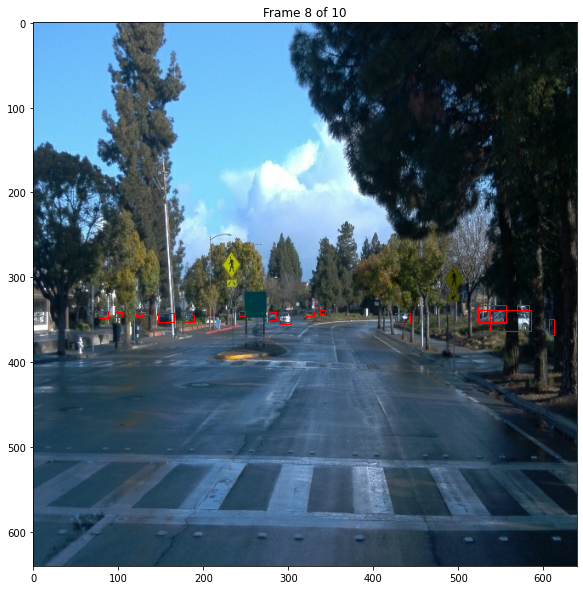

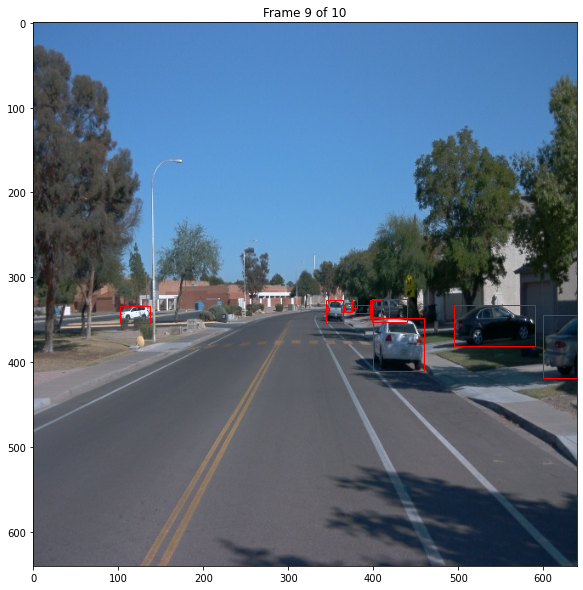

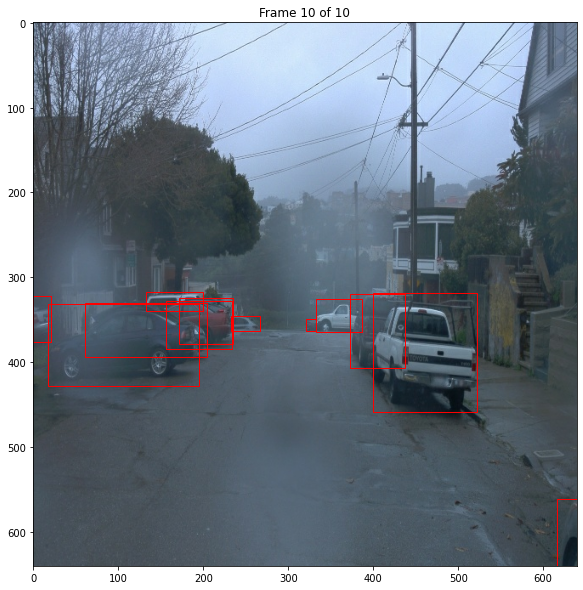

In [25]:
num_istances_display = 10

tot_num_frames = len(list(dataset))
num_istances_display = min(num_istances_display, tot_num_frames)
dataset = dataset.shuffle(2000)
dataset_to_display = dataset.take(num_istances_display)

curr_ist = 0

for instance in dataset_to_display:
   curr_ist += 1
   display_instances(instance, curr_ist, num_istances_display)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

### Objects distribution

34855.0
10423.0
270.0


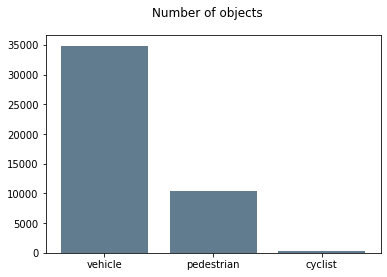

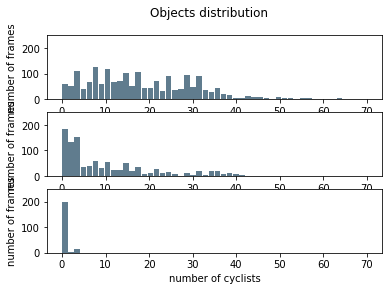

In [26]:
curr_ist = 0
tot_box_area = np.array([])
num_veh_distr = np.array([])
num_ped_distr = np.array([])
num_cyc_distr = np.array([])

for instance in dataset:
    curr_ist += 1

    classes = instance['groundtruth_classes'].numpy()

    num_veh = (classes == 1).sum()
    num_veh_distr = np.append(num_veh_distr, num_veh)
    num_ped = (classes == 2).sum()
    num_ped_distr = np.append(num_ped_distr, num_ped)
    num_cyc = (classes == 4).sum()
    num_cyc_distr = np.append(num_cyc_distr, num_cyc)

    img = instance['image'].numpy()
    h, w, c = img.shape
    bboxes = instance['groundtruth_boxes'].numpy()
    bboxes[:, (0, 2)] *= h
    bboxes[:, (1, 3)] *= w
    box_h = bboxes[:, 2] - bboxes[:, 0]
    box_w = bboxes[:, 3] - bboxes[:, 1]
    box_area = box_h * box_w
    tot_box_area = np.concatenate([tot_box_area, box_area])

tot_num_veh = np.sum(num_veh_distr)
tot_num_ped = np.sum(num_ped_distr)
tot_num_cyc = np.sum(num_cyc_distr)

print(tot_num_veh)
print(tot_num_ped)
print(tot_num_cyc)

fig = plt.figure()
fig.suptitle("Number of objects")
ax = plt.subplot(1, 1, 1)
ax.bar(['vehicle', 'pedestrian', 'cyclist'], [tot_num_veh, tot_num_ped, tot_num_cyc], color='#607c8e')
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig.suptitle("Objects distribution")
ax1.hist(num_veh_distr[num_veh_distr != 0], range=[0, 70], bins=50, rwidth=0.9, color='#607c8e')
ax1.set_ylim([0, 250])
ax1.set(xlabel='number of vehicles', ylabel='number of frames')
ax2.hist(num_ped_distr[num_ped_distr != 0], range=[0, 70], bins=50, rwidth=0.9, color='#607c8e')
ax2.set_ylim([0, 250])
ax2.set(xlabel='number of pedestrians', ylabel='number of frames')
ax3.hist(num_cyc_distr[num_cyc_distr != 0], range=[0, 70], bins=50, rwidth=0.9, color='#607c8e')
ax3.set_ylim([0, 250])
ax3.set(xlabel='number of cyclists', ylabel='number of frames')
plt.show()

### Objects size

35055
8465
2028


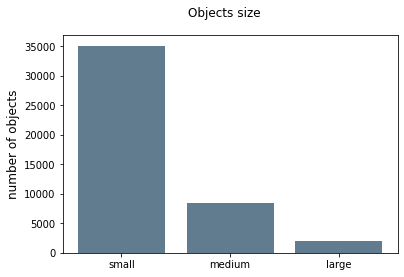

In [28]:
num_small_obj = 0
num_med_obj = 0
num_large_obj = 0

for area in tot_box_area:
    if area < 1024:
        num_small_obj += 1
    elif area < 9216:
        num_med_obj += 1
    else:
        num_large_obj += 1

print(num_small_obj)
print(num_med_obj)
print(num_large_obj)

fig = plt.figure()
fig.suptitle("Objects size")
ax = plt.subplot(1, 1, 1)
ax.bar(['small', 'medium', 'large'], [num_small_obj, num_med_obj, num_large_obj], color='#607c8e')
plt.ylabel('number of objects', fontsize=12)
plt.show()